# Add title

## Import libraries

In [3]:
import numpy as np
import plaidml.keras
import os
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras import backend as K
print(K)

import keras
from keras.preprocessing.image import ImageDataGenerator

print("Keras version %s" %keras.__version__)

<module 'plaidml.keras.backend' from 'E:\\anaconda3\\envs\\plaidML\\lib\\site-packages\\plaidml\\keras\\backend.py'>
Keras version 2.2.4


## Load data from pickle file

In [15]:
import pickle

#import os
#print(os.listdir('E:\\Xception\\TUT-SED-synthetic-2016\\features\\'))

# open a file, where you stored the pickled data
file = open('E:\\Xception\\TUT-SED-synthetic-2016\\features\\TUT-SED-synthetic-2016-mix-0.cpickle', 'rb')

# dump information to that file
data = pickle.load(file, encoding='latin1')

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

print(data)

Showing the pickled data:
The data  0  is :  stat
The data  1  is :  feat
{'stat': [{'std': array([6.48318544, 6.87151156, 6.86719852, 6.84275711, 6.83761415,
       6.87223237, 6.89335253, 6.92458411, 6.93459117, 6.91495178,
       6.90410583, 6.88555692, 6.87259983, 6.85547978, 6.85697284,
       6.86119989, 6.83716133, 6.83862895, 6.80448932, 6.77448622,
       6.74729871, 6.72425443, 6.66255718, 6.61520045, 6.59656039,
       6.57226555, 6.56157618, 6.55718484, 6.53088663, 6.51751872,
       6.50158522, 6.4990145 , 6.4573621 , 6.44153455, 6.37599137,
       6.2957752 , 6.26178836, 6.19545378, 6.10835941, 5.96484113]), 'S2': array([1391514.69663058, 1389102.44883084, 1387606.75029818,
       1383882.19306255, 1380225.16296667, 1359373.80533713,
       1347661.35211995, 1339987.19396292, 1342874.90314537,
       1344129.0207919 , 1351640.94493066, 1367952.96992322,
       1379346.9941945 , 1389842.18241575, 1396542.08414379,
       1398687.32487677, 1414705.27556523, 1425543.10995115

In [2]:
import pickle
import pandas as pd

directory = 'E:\\Xception\\TUT-SED-synthetic-2016\\features\\'
list_dt = []
dictionary = {}

for i in range(100):
    file_name = directory+'TUT-SED-synthetic-2016-mix-'+str(i)+'.cpickle'
    #print(file_name)
    
    # open a file, where you stored the pickled data
    file = open(file_name, 'rb')

    # dump information to that file
    #data = pickle.load(file, encoding='latin1')
    #unpickled_df.append(pd.read_pickle(file))
    list_dt.append(pickle.load(file, encoding='latin1'))
    
    # close the file
    file.close()
    
featuresdf = pd.DataFrame(list_dt)

In [18]:
# Load various imports 
import pandas as pd
import os
import librosa

directory = 'E:\\Xception\\TUT-SED-synthetic-2016\\audio\\'

max_pad_len = 174

def extract_features(file_name):
   
    #try:
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40, n_fft=440, hop_length=73, n_mels=40)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_fft=1024, hop_length=882, n_mels=40)
        #pad_width = max_pad_len - mfccs.shape[1]
        #mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    #except Exception as e:
    #    print("Error encountered while parsing file: ", file_name)
    #    return None 
     
    return mfccs
    
# Set the path to the full UrbanSound dataset 
#fulldatasetpath = '/Xception/UrbanSound8K/audio/'

#metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for i in range(100):
    
    if i%10==0:
        print("processing element ",i)
    
    file_name = directory+'TUT-SED-synthetic-2016-mix-'+str(i)+'.wav'
    
    #class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature'])#,'class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

processing element  0
processing element  10
processing element  20
processing element  30
processing element  40
processing element  50
processing element  60
processing element  70
processing element  80
processing element  90
Finished feature extraction from  100  files


In [17]:
featuresdf['feature'][0].shape

(40, 116008)

## Load meta file (onset, offset, labels)

In [17]:
import pandas as pd
df = pd.read_csv('E:\\Xception\\TUT-SED-synthetic-2016\\meta.txt', delimiter = "\t", header=None)
#df.drop(columns=[1, 5])
df.columns = ["file", "drop1", "onset", "offset", "label", "drop2"]
df = df.drop(columns=["drop1", "drop2"])
df

,file,onset,offset,label
0,audio/TUT-SED-synthetic-2016-mix-0.wav,2.82,2.90,horsewalk
1,audio/TUT-SED-synthetic-2016-mix-0.wav,3.08,3.16,horsewalk
2,audio/TUT-SED-synthetic-2016-mix-0.wav,3.32,3.44,horsewalk
3,audio/TUT-SED-synthetic-2016-mix-0.wav,3.62,3.72,horsewalk
4,audio/TUT-SED-synthetic-2016-mix-0.wav,3.82,3.96,horsewalk
...,...,...,...,...
36321,audio/TUT-SED-synthetic-2016-mix-9.wav,311.38,311.52,bird_singing
36322,audio/TUT-SED-synthetic-2016-mix-9.wav,334.86,335.00,bird_singing
36323,audio/TUT-SED-synthetic-2016-mix-9.wav,335.22,335.74,bird_singing
36324,audio/TUT-SED-synthetic-2016-mix-9.wav,335.82,336.28,bird_singing


## Load data, split sounds and extract features

In [18]:
# Load various imports 
import pandas as pd
import librosa

directory = 'E:\\Xception\\TUT-SED-synthetic-2016\\audio\\'

max_pad_len = 0    

features = []

# Iterate through each sound file and extract the features 
for i in range(100):
    
    if i%10==0:
        print("processing element ",i)
    
    file_name = directory+'TUT-SED-synthetic-2016-mix-'+str(i)+'.wav'
    
    print(file_name)
    
    # extract metadata of single audio file
    audio, sr = librosa.load(file_name, res_type='kaiser_fast')
    query_name = file_name[len('E:\\Xception\\TUT-SED-synthetic-2016\\audio\\'):]
    query_name = 'audio/' + query_name
    subdf = df.query('file==@query_name')
        
    # split subsounds and extract features of each subfile
    for index, row in subdf.iterrows():
        mfccs = librosa.feature.mfcc(y=audio[int(sr*row['onset']):int(sr*row['offset'])], sr=sr, n_mfcc=40, n_fft=440, hop_length=73)
        
        #compute maximum pad length needed
        num_frames = mfccs.shape[1]
        # Update frames maximum
        if (num_frames > max_pad_len):
            max_pad_len = num_frames
        
        # add extracted features to list
        features.append([mfccs, row['label']])

# pad data since they have different length
for i in range(len(features)):
    
    pad_width = max_pad_len - features[i][0].shape[1]
    features[i][0] = np.pad(features[i][0], pad_width=((0, 0), (0, pad_width)), mode='constant')
    
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

processing element  0
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-0.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-1.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-2.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-3.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-4.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-5.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-6.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-7.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-8.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-9.wav
processing element  10
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-10.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-mix-11.wav
E:\Xception\TUT-SED-synthetic-2016\audio\TUT-SED-synthetic-2016-m

## Save processed data to pickle file

In [19]:
featuresdf.to_pickle('E:\\Xception\\TUT-SED-synthetic-2016\\processed_data_frame.pkl')
# delete data structure to save ram space (reload dataframe with next block)
reset_selective -f features

## Load processed data to pikle file

In [1]:
import pandas as pd
featuresdf = pd.read_pickle('E:\\Xception\\TUT-SED-synthetic-2016\\processed_data_frame.pkl')

## Preprocess data

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# delete dataframe to save memory
reset_selective -f featuresdf

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

# delete X to save memory
reset_selective -f X

## Model definition

In [9]:
from keras.models import Model
from keras.layers import SeparableConv2D, ZeroPadding2D, Activation, Dropout, Dense, \
                            Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import Input, optimizers

num_rows = 40
num_columns = 4223
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]

def Net(input_shape, num_classes, dilated_kernel, dilation, dilated_padding):
    
    # input layer
    inputs = Input(shape=(num_rows, num_columns, num_channels))
    
    # DWS-CNN layer 1
    x = ZeroPadding2D(padding=(2))(inputs)
    # use valid padding since padding is introduced before since it has a special form
    x = SeparableConv2D(256,kernel_size=(5,5), strides=(1,1), padding='valid')(x)
    x = Activation('relu')(x)
    # Batch Normalisation before passing it to the next layer
    x = BatchNormalization()(x)
    # Pooling
    x = MaxPooling2D(pool_size=(1,5), strides=(1,5), padding='valid')(x)
    # Dropout
    x = Dropout(0.25)(x)
    
    # DWS-CNN layer 2
    x = ZeroPadding2D(padding=(2))(x)
    # use valid padding since padding is introduced before since it has a special form
    x = SeparableConv2D(256,kernel_size=(5,5), strides=(1,1), padding='valid')(x)
    x = Activation('relu')(x)
    # Batch Normalisation before passing it to the next layer
    x = BatchNormalization()(x)
    # Pooling
    x = MaxPooling2D(pool_size=(1,4), strides=(1,4), padding='valid')(x)
    # Dropout
    x = Dropout(0.25)(x)
    
    # DWS-CNN layer 3
    x = ZeroPadding2D(padding=(2))(x)
    # use valid padding since padding is introduced before since it has a special form
    x = SeparableConv2D(256,kernel_size=(5,5), strides=(1,1), padding='valid')(x)
    x = Activation('relu')(x)
    # Batch Normalisation before passing it to the next layer
    x = BatchNormalization()(x)
    # Pooling
    x = MaxPooling2D(pool_size=(1,2), strides=(1,2), padding='valid')(x)
    # Dropout
    x = Dropout(0.25)(x)
    
    # DIL-CNN 
    x = ZeroPadding2D(padding=(0, dilated_padding*dilation))(x)
    x = Conv2D(256, kernel_size=dilated_kernel, dilation_rate=(1,dilation))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # classifier layer
    x = GlobalAveragePooling2D(name='avg_pool')(x)
    outputs = Dense(num_labels,activation='sigmoid')(x)
    
    # model compilation for training
    adam = optimizers.Adam(lr=0.0001)
    model = Model(inputs, outputs)                            
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model


# create the model
input_shape = (256, 256, 1)
num_classes = 10
dilated_kernel = (3,3)
dilation = (10)
dilated_padding = 2
model = Net(input_shape,num_classes,dilated_kernel,dilation,dilated_padding)
model.summary()

INFO:plaidml:Opening device "opencl_amd_gfx1010.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40, 4223, 1)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 44, 4227, 1)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 40, 4223, 256)     537       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 4223, 256)     0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 4223, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 844, 256)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 844, 256)      0         
__________

## Train the model (to be checked)

In [14]:
#from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 10
# low batch size due to memory maximum dimension, modify if using smaller dataset
num_batch_size = 3

#checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
#                               verbose=1, save_best_only=True)
start = datetime.now()

#history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)
history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.16, verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 24410 samples, validate on 4650 samples
Epoch 1/10
24410/24410 [==============================] - 2815s 115ms/step - loss: 1.8790 - acc: 0.3358 - val_loss: 1.9532 - val_acc: 0.3673
Epoch 2/10
24410/24410 [==============================] - 2847s 117ms/step - loss: 1.6331 - acc: 0.4486 - val_loss: 1.6903 - val_acc: 0.4376
Epoch 3/10
24410/24410 [==============================] - 2894s 119ms/step - loss: 1.4879 - acc: 0.5037 - val_loss: 1.5306 - val_acc: 0.4426
Epoch 4/10
24410/24410 [==============================] - 2801s 115ms/step - loss: 1.3838 - acc: 0.5412 - val_loss: 1.4736 - val_acc: 0.4826
Epoch 5/10
24410/24410 [==============================] - 2760s 113ms/step - loss: 1.3039 - acc: 0.5737 - val_loss: 1.3457 - val_acc: 0.5871
Epoch 6/10
24410/24410 [==============================] - 2790s 114ms/step - loss: 1.2433 - acc: 0.5945 - val_loss: 1.3327 - val_acc: 0.5796
Epoch 7/10
24410/24410 [==============================] - 2756s 113ms/step - loss: 1.1830 - acc: 0.6179 -

## Evaluate model

In [15]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=num_batch_size)
print("test loss, test acc:", results)

Evaluate on test data
7266/7266 [==============================] - 144s 20ms/step
test loss, test acc: [1.3543415148923224, 0.5606936530250838]


## Save model

In [19]:
filename = 'E:\\Xception\\TUT-SED-synthetic-2016\\model1.h5'
model.save(filename)

## Plot Results

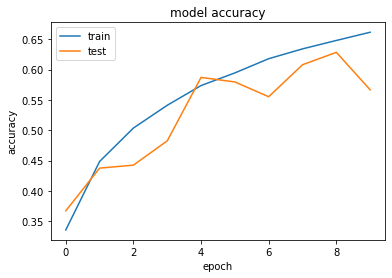

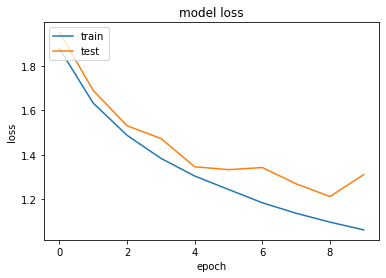

In [16]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Compute other metrics (to be checked)

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=2, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

7266/7266 [==============================] - 122s 17ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets